In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, plot_confusion_matrix

In [2]:
df = pd.read_csv('clean.csv')

In [3]:
weight = sum(df['target'] == 0) / df.shape[0]
df['sample_weight'] = df['target'].apply(lambda x: weight if x == 1 else 1 - weight)
sample = df.sample(n=int(weight * df.shape[0]), random_state=0, weights='sample_weight', axis=0)

In [4]:
targets = sample['target']
l = list(sample.columns.values)
l.remove('target')
l.remove('sample_weight')
features = sample[l]
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=0)

In [5]:
tree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [6]:
MAX_DEPTH = [3, 9, 10, 11]
MIN_SAMPLES_SPLIT = [900, 1000, 1100]
param_grid = {
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT
}
scoring = ["accuracy", "precision", "recall"]
grid = GridSearchCV(tree, param_grid=param_grid, cv=10, scoring=scoring, refit="accuracy")

In [7]:
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [9, 10, 11],
                         'min_samples_split': [900, 1000, 1100]},
         

In [8]:
results = pd.DataFrame.from_dict(grid.cv_results_)
filtered_results = results[['param_max_depth',
                            'param_min_samples_split',
                            'mean_test_accuracy',
                            'mean_test_precision',
                            'mean_test_recall'
                           ]]
filtered_results

,param_max_depth,param_min_samples_split,mean_test_accuracy,mean_test_precision,mean_test_recall
0,9,900,0.614167,0.617147,0.819170
1,9,1000,0.614140,0.617398,0.817639
2,9,1100,0.614093,0.617511,0.816769
3,10,900,0.614592,0.618233,0.815155
4,10,1000,0.614510,0.618492,0.813318
5,10,1100,0.614424,0.618573,0.812470
6,11,900,0.613875,0.618176,0.811989
7,11,1000,0.613856,0.618578,0.809700
8,11,1100,0.613824,0.618692,0.808970


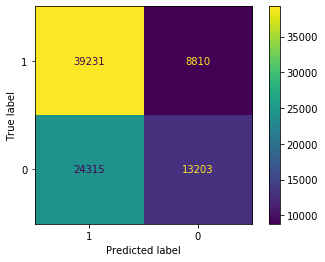

In [12]:
plot_confusion_matrix(grid.best_estimator_, x_test, y_test, values_format='d', labels=[1,0])

In [13]:
print(classification_report(y_test, grid.best_estimator_.predict(x_test), labels=[1,0]))

              precision    recall  f1-score   support

           1       0.62      0.82      0.70     48041
           0       0.60      0.35      0.44     37518

    accuracy                           0.61     85559
   macro avg       0.61      0.58      0.57     85559
weighted avg       0.61      0.61      0.59     85559



In [20]:
model = grid.best_estimator_

In [30]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 0])

In [32]:
confusion_df = pd.DataFrame(columns=['minority', 'true', 'predicted'])

In [38]:
confusion_df['minority'] = x_test['applicant_minority']
confusion_df['true'] = y_test
confusion_df['predicted'] = model.predict(x_test)

In [41]:
minority = confusion_df[confusion_df['minority'] == 1]

In [46]:
pd.crosstab(confusion_df['true'], confusion_df['predicted'], rownames=['true'], colnames=['predicted'], margins=True)

predicted,0,1,All
true,,,
0,13203,24315,37518
1,8810,39231,48041
All,22013,63546,85559


In [55]:
13203/37518

0.35191108268031346

In [49]:
# Accuracy
(13203 + 39231) / 85559

0.6128402622751552

In [50]:
# Precision
39231 / (39231 + 24315)

0.6173637994523652

In [51]:
# Recall
39231 / (39231 + 8810)

0.8166149747091026

In [47]:
pd.crosstab(minority['true'], minority['predicted'], rownames=['true'], colnames=['predicted'], margins=True)

predicted,0,1,All
true,,,
0,6775,5081,11856
1,4522,6230,10752
All,11297,11311,22608


In [56]:
6775/11856

0.5714406207827261

In [52]:
# Accuracy
(6230 + 6775) / 22608

0.5752388535031847

In [53]:
# Precision
6230 / (6230 + 5081)

0.5507912651401291

In [54]:
# Recall
6230 / (6230 + 4522)

0.5794270833333334